# Super Dense Coding Protocol

This notebook demonstrates Super Dense Coding (SDC) in quantum computing. We first use Qiskit's simulator to test our quantum circuit, and then try it out on a real quantum computer.


# Difference between Super Dense Coding and Quantum Teleportation

Quantum teleportation and super dense coding are closely related and might cause confusion if not properly explained or differentiate. 

Quantum teleportation is a process by which the state of qubit (<math xmlns="http://www.w3.org/1998/Math/MathML"><mi>&#x3C8;</mi></math>) can be transmitted from one location to another, with the help of classical communication and Bell Pair. In other words, we can say it is a protocol that destroys the quantum state of a qubit in one location and recreates it on
a qubit at a distant location, with the help of shared entanglement, while  super dense coding is a procedure that allows someone to send two classical bits to another party using just a single qubit of communication

The teleportation protocol is actually a flipped version of the super-dense coding protocol, in
the sense that Alice and Bob merely “swap their equipment.”



# Super Dense Coding





![image.png](attachment:image.png)

# The process involves 3 steps:

## Step 1
The process starts with a third party, who we'll call (Eve). Two qubits are prepared by Eve in an entangled state. She initially starts the 2 qubits in the basis state |0>. She applies Hadamard gate (H) to the first qubit to create superposition. She then applies CNOT gate (cx) using the first qubit as a control and the second as the target. This is the entangled state we mention earlier. 

### Outcome States

Eve first applied Hadamard gate. We will ignore the the square root (2) from Hadamard gate matrix for simplicity. 

When H gate is applied to first qubit, it enters superposition; thus we get the states 00 + 01, where the second qubit remains 0.

|00> <math xmlns="http://www.w3.org/1998/Math/MathML"><mo>&#x2192;</mo></math> |00> + |01>

Then Eve applied CNOT gate. The CNOT gate entangled both qubits. That is, it flips the target if the control is 1. Note that the control is on our first qubit.

CNOT (|00> + |10>) <math xmlns="http://www.w3.org/1998/Math/MathML"><mo>&#x2192;</mo></math> |00> + |11>

## Step 2

Eve sent the first qubit to Alice and second qubit to Bob. The goal of the protocol is for Alice to send 2 classical bits of information to Bob using her qubit. But before she does, she needs to apply a set of quantum gates to her qubit depending on the 2 bits of information she wants to send


Encoding Rules for Super Dense Coding (Alice protocol)
Quantum gates/rules


        00: I                I(00 + 11) = 00 + 11

        01: X                X(00 + 11) = 10 + 01 

        10: Z                Z(00 + 11) = 00 - 11 

        11: ZX               ZX(00 + 11) = 10 - 11 

Thus if she wants to send a 00, she does nothing to her qubit (apply identity gate). If she sends a 01, then she applies the X gate. Depending on what she wants to send, she applies the appropriate gate. Alice then sends her qubit to Bob for the final step in the process


## Step 3

Bob receives Alice's qubit (first qubit) and uses his qubit to reverse the process Eve created. That is, he is immediately certain which operation he needs to perform in order to restore his state to Alice’s original state. Notice
that he does not need to have knowledge of the state in order to restore it — he only needs knowledge of the restoration operation.


Bob applies CNOT gate using the first qubit as control and the second as target. Then he applied Hadamard gate and finally performs a measurement in both qubits to extract the classical bits encoded in Alice's qubit.


Encoding Rules for Super Dense Coding (Bob protocol)




        Alice states   After Bob’s CNOT   Bob’s Hadamard gate (H) and measurements
            00 + 11        00 + 01          00
            10 + 01        10 + 01          01
            00 - 11        00 - 11          10
            10 - 11        10 - 11         -11



When Bob performs measurements, he ends up with four possible outcomes with probability of 1 each. Note that the last outcome has a negative sign -11, writing it as 11 is also correct because the probability is calculated as the amplitude of squared.


# Simulating the Super Dense Coding Protocol

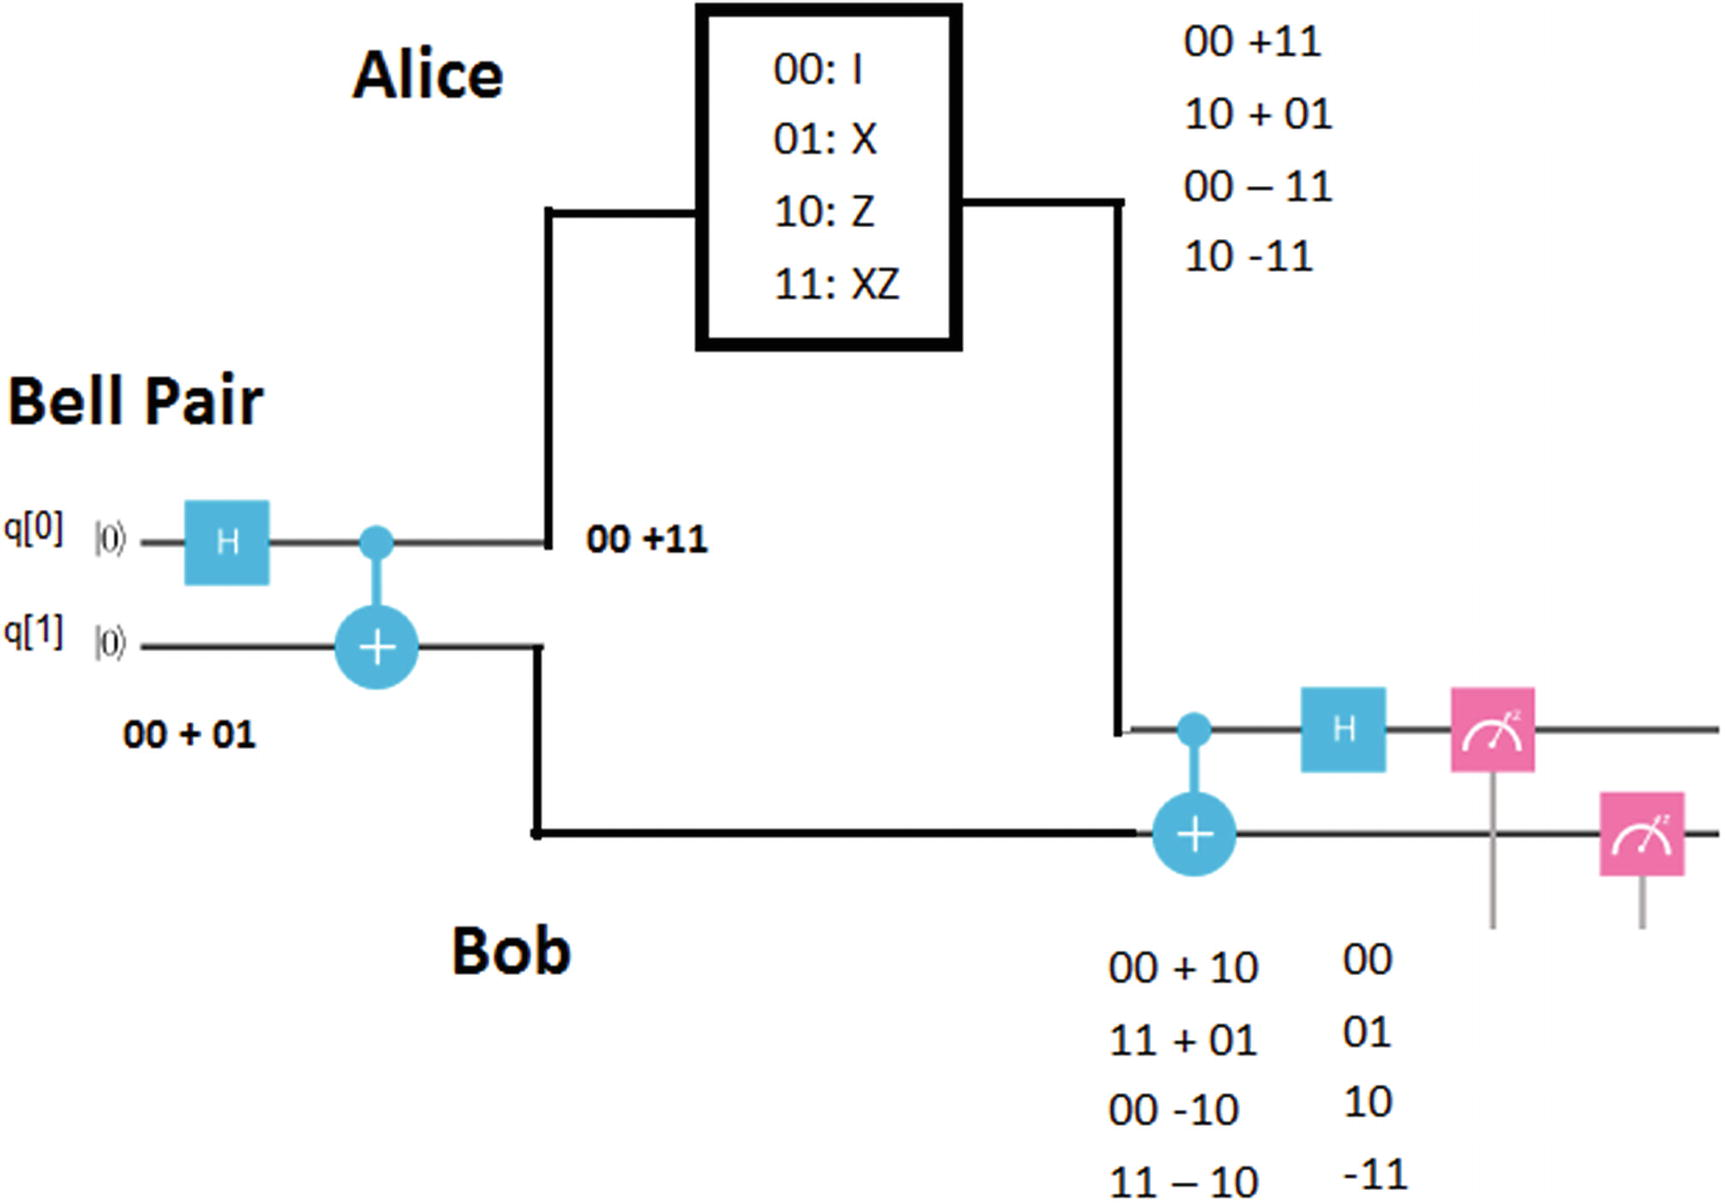

In [ ]:
# Importing all necessary libraries for work.

from qiskit import *
from qiskit.tools.visualization import plot_histogram

In [ ]:
# Create the quantum circuit
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)

qc.barrier()


# Next, generate the entangled pair between Alice and Bob (Remember: Hadamard followed by CX generates a Bell pair)
qc.h(q[0])
qc.cx(q[0], q[1])
qc.barrier()

# Next, apply the apply superdense coding protocol. First, we need to prepare the state Alice will like to send
#In this tutorial, Alice is sending 11

qc.z(q[0])
qc.x(q[0])
qc.barrier()

#Apply Bob recovery protocol
qc.cx(q[0], q[1])
qc.h(q[0])

#Take measurement to see which classical bit of information Bob receives
qc.barrier()
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])

#Draw our output
qc.draw(output = "mpl")

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=1024)
sim_result = job_sim.result()

measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)

# Super dense coding on a real quantum computer


Let's see how super dense coding works on real quantum computer.

In [ ]:

# First, see what devices we are allowed to use by loading our saved accounts
IBMQ.enable_account("IBM Q TOKEN")

In [ ]:
from qiskit.providers.ibmq import least_busy
backend = IBMQ.backend(name='ibm-q')
qobj = compile(qc, backend, shots=2000)
job = backend.run(qobj)
exp_result = job.result()

exp_measurement_result = exp_result.get_counts(qc)
print(exp_measurement_result)
plot_histogram(exp_measurement_result)